In [6]:
import numpy as np
import pandas as pd
data=pd.read_csv('dataset-2.csv')

In [7]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [8]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1030 non-null   float64
 1   x2      1030 non-null   float64
 2   x3      1030 non-null   float64
 3   x4      1030 non-null   float64
 4   x5      1030 non-null   float64
 5   x6      1030 non-null   float64
 6   x7      1030 non-null   float64
 7   x8      1030 non-null   int64  
 8   target  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [9]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,target
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
data.isnull().sum()

x1        0
x2        0
x3        0
x4        0
x5        0
x6        0
x7        0
x8        0
target    0
dtype: int64

In [11]:
data.isna().sum()

x1        0
x2        0
x3        0
x4        0
x5        0
x6        0
x7        0
x8        0
target    0
dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=data.iloc[:,0:8]
x



,x1,x2,x3,x4,x5,x6,x7,x8
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [14]:
y=data.iloc[:,8:]
y


,target
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [139]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [178]:
model=LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [179]:
y_pred=model.predict(x_test)

In [180]:
from sklearn.metrics import mean_squared_error

In [181]:
mse=mean_squared_error(y_pred,y_test)

In [182]:
mse

95.97094009110684

In [183]:
from sklearn.linear_model import Ridge
model1=Ridge()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
mse_ridge=mean_squared_error(y_pred1,y_test)
mse_ridge

95.97089554036006

In [184]:
from sklearn.linear_model import Lasso
model2=Lasso()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
mse_lasso=mean_squared_error(y_pred,y_test)
mse_lasso

95.97094009110684

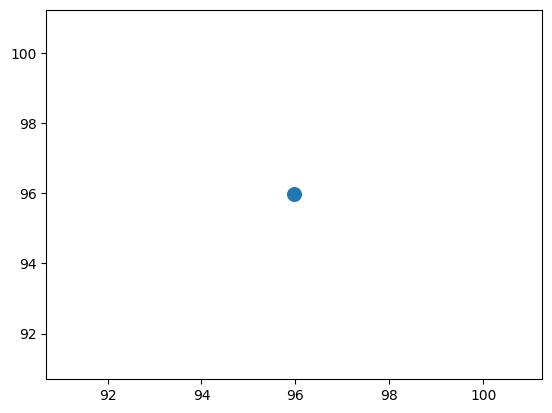

In [185]:
import matplotlib.pyplot as plt
x=mse
y=mse_ridge
z=mse_lasso
plt.scatter(x,y,z)
plt.show()

In [18]:
from sklearn.metrics import r2_score


In [187]:
r2_score_li=r2_score(y_pred,y_test)


In [188]:
r2_score_li

0.42317047978909705

In [189]:
r2_score_ri=r2_score(y_pred1,y_test)

In [190]:
r2_score_ri

0.4231690010791479

In [191]:
r2_score_las=r2_score(y_pred2,y_test)

In [192]:
r2_score_las

0.41601654757498596

In [19]:
from sklearn.metrics import mean_absolute_error

In [194]:
mae=mean_absolute_error(y_pred,y_test)

In [195]:
mae

7.745559243921435

In [196]:
mae_ri=mean_absolute_error(y_pred1,y_test)

In [197]:
mae_ri

7.745553967204023

In [198]:
mae_las=mean_absolute_error(y_pred2,y_test)

In [199]:
mae_las

7.743431486232525

In [200]:
from sklearn.svm import SVR
model4=SVR()

In [201]:
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)

C:\Users\hemav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [202]:
r2_score_svm=r2_score(y_pred4,y_test)


In [203]:
r2_score_svm

-11.523177284674997

In [204]:
from sklearn.ensemble import RandomForestRegressor
model5=RandomForestRegressor(n_estimators=200,max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=42,n_jobs=1)

In [205]:
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)

C:\Users\hemav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [206]:
r2_score_rf=r2_score(y_pred,y_test)

In [207]:
r2_score_rf

0.42317047978909705

In [208]:
mae_5=mean_absolute_error(y_pred5,y_test)
mae_5

3.7813524702380987

In [209]:
corr_mat=data.corr()
corr_mat

,x1,x2,x3,x4,x5,x6,x7,x8,target
x1,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
x2,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
x3,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
x4,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
x5,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
x6,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
x7,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
x8,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
target,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
model6=GradientBoostingRegressor(n_estimators=500,learning_rate=0.03,max_depth=3,subsample=0.8)
model6.fit(x_train,y_train)
y_pred6=model6.predict(x_test)



C:\Users\hemav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [20]:
r2_score_xgb=r2_score(y_pred6,y_test)

In [21]:
r2_score_xgb

0.8940320565392725

In [22]:
mae_xgb=mean_absolute_error(y_pred6,y_test)

In [23]:
mae_xgb

3.520228906361762

In [235]:
data.duplicated().sum()

np.int64(25)

In [236]:
data.drop_duplicates(inplace=True)

In [237]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [24]:
import pickle as pkl
with open('xgb_model.pkl', 'wb') as file:
    pkl.dump(model6, file)


In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
import tensorflow as tf

In [30]:
sentences=["Attention is all you need"]
tokenizer=Tokenizer()
tokenizer.fit_on_texts(sentences)
seq=tokenizer.texts_to_sequences(sentences)
print("tokenized:",seq)

tokenized: [[1, 2, 3, 4, 5]]


In [ ]:
seq_tensor=tf.constant(seq)  